In [1]:
from pseudowalls import *
%display latex

# Initialize Cherns

In [2]:
var("R C D r c d", domain="real")
var("A", latex_name=r"{\alpha_0}", domain="real")
var("B", latex_name=r"{\beta_0}", domain="real")
P = A, B

In [3]:
v = Chern_Char(R,C,D)
v

In [4]:
twisted_v = Twisted_Chern_Char(B,
            R,
            var("twisted_v1", latex_name = r"\mathrm{ch}_1^{\beta_0}(v)", domain="real"),
            var("twisted_v2", latex_name = r"\mathrm{ch}_2^{\beta_0}(v)", domain="real"),
)
twisted_v

In [5]:
assume(twisted_v2 > 0)

In [6]:
u = Chern_Char(r,c,d)
u

In [7]:
twisted_u = Twisted_Chern_Char(B,
            r,
            var("twisted_u1", latex_name = r"\mathrm{ch}_1^{\beta_0}(u)", domain="real"),
            var("twisted_u2", latex_name = r"\mathrm{ch}_2^{\beta_0}(u)", domain="real"),
)
twisted_u

# Numerical Conditions

Condition of $P = (A,B)$ being on $\Theta_v$ (i.e. $ch_2^{A,B}(v) = 0$) expressed in terms of twisted Chern character for $v$ at $\beta=B$:

In [8]:
A2_subs = solve(
    stability.Tilt(*P).degree(twisted_v) == 0,
    A^2)[0]

A2_subs

A^2 == 2*twisted_v2/R

## Condition: $ch_2^{P}(u) > 0$

In [9]:
( radius_condition_before_sub := stability.Tilt(*P).degree(twisted_u) > 0 )

-1/2*A^2*r + twisted_u2 > 0

In [10]:
radius_condition = expand(
    ( radius_condition_before_sub / r ).expand().subs(
        A2_subs
    ) * r * R
)
radius_condition

R*twisted_u2 - r*twisted_v2 > 0

In [11]:
from plots_and_expressions import c_in_terms_of_q, beta
radius_condition_d_bound = (
    radius_condition
    .subs(twisted_u.ch[2] == u.twist(B).ch[2])
    .expand()
    .add_to_both_sides(B*R*c - B^2*R*r/2 + r*twisted_v.ch[2])
    .divide_both_sides(R)
    .subs(c_in_terms_of_q.subs(beta==B))
    .expand()
)
radius_condition_d_bound

d > 1/2*B^2*r + B*q + r*twisted_v2/R

## Condition: $\Delta(u) \geq 0$

In [12]:
from plots_and_expressions import bgmlv2_d_upperbound_terms

In [13]:
(bgmlv2_d_upperbound_terms.linear
 + bgmlv2_d_upperbound_terms.const
 + bgmlv2_d_upperbound_terms.hyperbolic)

1/2*beta^2*r + beta*q + 1/2*q^2/r

## Condition: $\Delta(v-u) \geq 0$

In [14]:
from plots_and_expressions import bgmlv3_d_upperbound_terms, ch1bv, ch2bv, q

(bgmlv3_d_upperbound_terms.linear
 + bgmlv3_d_upperbound_terms.const
 + bgmlv3_d_upperbound_terms.hyperbolic)

1/2*beta^2*r + beta*q - 1/2*(ch1bv - q)^2/(R - r) + ch2bv

consider lowerbound inducesd when $r < R$ and compare to bound given by radius condition:

In [81]:
#from plots_and_expressions import bgmlv3_d_upperbound_alt
(
(
    radius_condition_d_bound.rhs()
    - (bgmlv3_d_upperbound_terms.linear
     + bgmlv3_d_upperbound_terms.const
     + bgmlv3_d_upperbound_terms.hyperbolic)
).factor()* (R-r) * R #.subs(q==c-r*beta)# 
).factor()

1/2*R*q^2 - R*q*twisted_v1 + 1/2*R*twisted_v1^2 - R^2*twisted_v2 + 2*R*r*twisted_v2 - r^2*twisted_v2

### Specialize last 2 conditions to $\beta=\beta_0$

In [16]:
# substitutions to replace beta -> beta_0 in relevant equations to specialize to problem 1
beta_substitutions = [beta==B, ch1bv==twisted_v.ch[1], ch2bv==twisted_v.ch[2]]

In [17]:
for terms in [bgmlv2_d_upperbound_terms, bgmlv3_d_upperbound_terms]:
    terms.const = terms.const.subs(beta_substitutions)
    terms.linear = terms.linear.subs(beta_substitutions)
    terms.hyperbolic = terms.hyperbolic.subs(beta_substitutions)
    terms.all = terms.const + terms.linear + terms.hyperbolic

In [18]:
bgmlv3_d_upperbound_terms.linear

1/2*B^2*r

In [19]:
bgmlv2_d_upperbound_terms.linear

1/2*B^2*r

# Example bounds

In [20]:
from plots_and_expressions import v_example, beta_minus
v_example

In [21]:
B_example = -2/3 - 1/99 # anything less than -2/3

In [22]:
v_example_twisted = v_example.twist(B_example)
v_example_twisted

In [23]:
q_example = 2

In [24]:
example_substitutions = [
    B == B_example,
    twisted_v.ch[0] == v_example_twisted.ch[0],
    twisted_v.ch[1] == v_example_twisted.ch[1],
    twisted_v.ch[2] == v_example_twisted.ch[2],
    q == q_example
]

In [25]:
example_upperbound_1 = (bgmlv3_d_upperbound_terms.linear
 + bgmlv3_d_upperbound_terms.const
 + bgmlv3_d_upperbound_terms.hyperbolic).subs(example_substitutions)
example_upperbound_1

4489/19602*r + 4489/2178/(r - 3) - 8579/6534

In [26]:
example_upperbound_2 = (bgmlv2_d_upperbound_terms.linear
 + bgmlv2_d_upperbound_terms.const
 + bgmlv2_d_upperbound_terms.hyperbolic).subs(example_substitutions)
example_upperbound_2

4489/19602*r + 2/r - 134/99

In [27]:
example_lowerbound_1 = radius_condition_d_bound.subs(example_substitutions).rhs()
example_lowerbound_1

2377/9801*r - 134/99

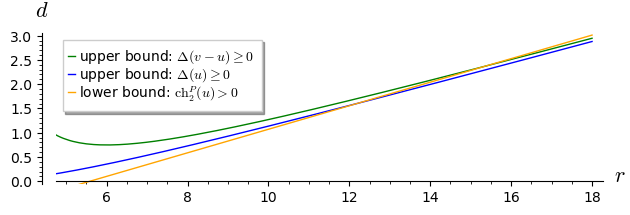

In [28]:
r_range = r,0,18

example_plot = (
    plot(example_upperbound_1, (r,3,18), rgbcolor="green", legend_label=r"upper bound: $\Delta(v-u)\geq 0$")
    + plot(example_upperbound_2, r_range, legend_label=r"upper bound: $\Delta(u)\geq 0$")
    + plot(example_lowerbound_1, r_range, rgbcolor="orange", legend_label=r"lower bound: $\mathrm{ch}_2^P(u)>0$")
)
example_plot.ymin(0)
example_plot.ymax(3)
example_plot.xmin(5)
example_plot.set_aspect_ratio(1.2)
example_plot.axes_labels([r"$r$", r"$d$"])
example_plot

# Finding intersection points

Find intersection of lower bound with upper bound from bgmlv2:

In [29]:
var("epsilon", latex_name=r"\varepsilon")
( intersections_bgmlv2 :=
    ( bgmlv2_d_upperbound_terms.all - radius_condition_d_bound.rhs() )
      .roots(r)
)

[(-sqrt(1/2)*q*sqrt(R/twisted_v2), 1), (sqrt(1/2)*q*sqrt(R/twisted_v2), 1)]

In [30]:
( positive_intersection_bgmlv2 :=
    intersections_bgmlv2[1][0]
)

sqrt(1/2)*q*sqrt(R/twisted_v2)

Quickly verify this is indeed a root:

In [31]:
(
    ( bgmlv2_d_upperbound_terms.all - radius_condition_d_bound.rhs() )
    .subs(r==positive_intersection_bgmlv2)
).factor()

0

Find intersection of lower bound with upper bound from bgmlv2:

In [32]:
var("epsilon", latex_name=r"\varepsilon")
( intersections_bgmlv3 :=
    ( bgmlv3_d_upperbound_terms.all - radius_condition_d_bound.rhs() )
      .roots(r)
)

[(1/2*(sqrt(2)*sqrt(R*twisted_v2)*(q - twisted_v1) + 2*R*twisted_v2)/twisted_v2,
  1),
 (-1/2*(sqrt(2)*sqrt(R*twisted_v2)*(q - twisted_v1) - 2*R*twisted_v2)/twisted_v2,
  1)]

In [33]:
( positive_intersection_bgmlv3 :=
    intersections_bgmlv3[1][0].expand().simplify()
)

-1/2*sqrt(2)*sqrt(R)*q/sqrt(twisted_v2) + 1/2*sqrt(2)*sqrt(R)*twisted_v1/sqrt(twisted_v2) + R

Quickly verify this is indeed a root too:

In [34]:
(
    ( bgmlv3_d_upperbound_terms.all - radius_condition_d_bound.rhs() )
    .subs(r==positive_intersection_bgmlv3)
).factor()

0

In [35]:
_common_factor = sqrt(R)/sqrt(twisted_v2)/sqrt(2)
( r_bound_expression :=
    min_symbolic(
        positive_intersection_bgmlv2 / _common_factor,
        positive_intersection_bgmlv3 / _common_factor
    )
    .__mul__(_common_factor)
    .expand()
    .simplify()
)

1/2*sqrt(2)*sqrt(R)*min(q, sqrt(2)*sqrt(R)*sqrt(twisted_v2) - q + twisted_v1)/sqrt(twisted_v2)

## Find which q value maximises the minimum of these two quantities

In [36]:
(maximising_q :=
    (positive_intersection_bgmlv3 - positive_intersection_bgmlv2)
     .roots(q)[0][0]
     .expand()
     .simplify()
)

1/2*sqrt(2)*sqrt(R)*sqrt(twisted_v2) + 1/2*twisted_v1

In [37]:
( r_max :=
    positive_intersection_bgmlv2
     .subs(q == maximising_q)
     .expand()
     .simplify()
)

1/4*sqrt(2)*sqrt(R)*twisted_v1/sqrt(twisted_v2) + 1/2*R

## rational B, involving epsilon

In [38]:
var("epsilon", latex_name=r"\varepsilon")
(
    ( bgmlv2_d_upperbound_terms.all - radius_condition_d_bound.rhs() - epsilon )
      .roots(r)
)

[(-1/2*(R*epsilon + sqrt(R^2*epsilon^2 + 2*R*q^2*twisted_v2))/twisted_v2, 1),
 (-1/2*(R*epsilon - sqrt(R^2*epsilon^2 + 2*R*q^2*twisted_v2))/twisted_v2, 1)]